In [ ]:
%matplotlib inline
import requests
import bs4
import numpy as np
import pandas as pd

## Outline
* HTTP requests: see [book](https://afraenkel.github.io/practical-data-science/07/requests.html) for details.
* Web Scraping and Crawling
* Parsing HTML

## Collecting Data

* Often the data you need doesn't exist in 'clean' csv files
* Solution: collect your own data!
    - Design your own experiment and collection (e.g. surveys, experiments).
    - Find related data on the Internet

## Data on the Internet

* The Internet contains *large* amounts of historical record:
    - archived record of events in the world (e.g. news stories)
    - human behaviors on the Internet (e.g. social network behaviors, commerce)
* Data for many natural experiments available for consumption

## How to collect data from the Internet

* Use a "data request endpoint" (i.e. published API: Application Programming Interface)
* Scrape and crawl content from web-pages.

Both communicate with content via HTTP requests!

## HTTP

* HyperText Transfer Protocol: is a *request-response* protocol 
* Allows one computer to talk to another over a network.
* Used to fetch data from servers hosting web-content ('web servers').
* Used to pass data over internal networks.

## Request-response model

HTTP follows the *request-response* (or client-server).

<div class="image-txt-container">
    
* The *request* is made by the client:
    * A computer web browser is the `client` to HTTP
    * "Client requests to view a video"
* The server returns a *response* to the request.
    * Youtube is a `server` that is sitting somewhere else.
    * "The content is served in a response"


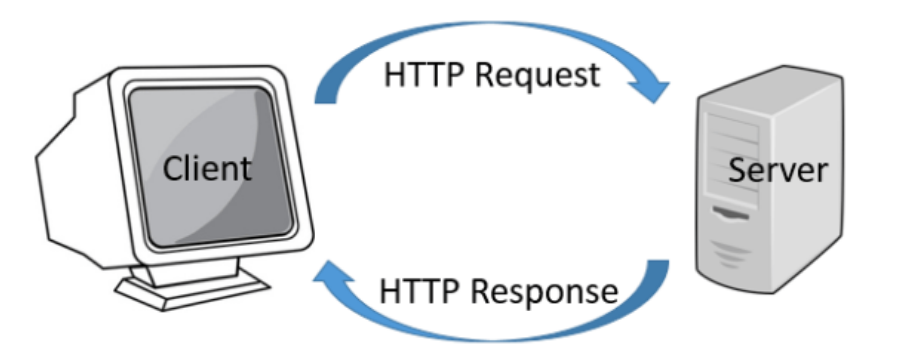

</div>

## Request-response model

When a request is sent to view content on a web-page:
* The server must process your request (prepare data for response)
* Send content from the the server to the client in its response.

This process requires computational resources for the server!

### Anecdote: Web-page hosting

* 15 year old makes a web-page that allows a user to:
    1. type in their name (client request)
    2. and receive a picture their (name's) spirit animal (server response).
* This requires a server-side 'look-up' of a picture for a given name.
* Hit Reddit front-page; $15,000 bill from cloud provider!


### Anecdote: Web-page hosting

Moral: every time you view a page, it costs the page owner money!

* Be mindful of your impact when collecting data from the Internet.

# HTTP Requests

## Making HTTP requests using `curl`

[`curl`](https://curl.haxx.se/docs/httpscripting.html) is a command-line tools that sends HTTP requests like a browser.

1. The client, curl, sends a HTTP request. 
2. The request contains a method (like GET, POST, HEAD etc)
3. The HTTP server responds with 
    - a status line (indicating if things went well), 
    - response headers 
    - a response body (usually) including the data.

# Request methods

* GET: is used to request data from a specified resource.

* HEAD: is almost identical to GET, but without the response body. HEAD requests are useful for checking what a GET request will return before actually making a GET request - like before downloading a large file or response body.

* DELETE: deletes the specified resource.

* POST: is used to send data to the server, for example, customer information, file upload, etc. using HTML forms.

* a few more

### Example: GET

* `curl` by default issues a `GET`:

```
curl -v https://httpbin.org/html
# (`-v` is short for verbose)
```

* Now type the same URL in the browser

### Example: POST

* a POST request with `curl` that sends 'Humpty Dumpty' as the parameter 'name'.
```
curl -d 'name=Humpty Dumpty' https://httpbin.org/post
# (`-d` is short for POST)
```

* You cannot send a POST directly in the url of a browser.


## Sending Data in GET: URL-encoding

* GET can also send data to the server. 
* Data is appended to the URL with a special syntax: 
    * `?` begins a 'query'
    * `http://cofe.ru/forum?id=666`
    * This method is good when you're sending small amounts of data. 
    * Also there might be cases you want parameters to be 'visible' in the URL (e.g. for crawlers)
* Understanding url-encoding helps structure your requests.

# Requests

* `requests` is a python package that allows you to use Python to interact with the Internet!  
* There are other packages (e.g. `urllib`), but `requests` is the easiest to use.

In fact, to get the UCSD home page is a simple as
```
import requests
text = requests.get("https://ucsd.edu").text
```


In [ ]:
import requests

# GET request (default)
url = "https://ucsd.edu"
resp = requests.get(url)

In [ ]:
# response object
resp

In [40]:
# body of response
print(type(resp.text))
print(len(resp.text))
resp.text[:1000]


<class 'str'>
580919


'<!DOCTYPE html>\n<html lang="en">\n  <head>\n  \n  \n\n \n\n\n\n\n\n    <meta charset="utf-8"/>\n    <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n    <meta content="width=device-width, initial-scale=1" name="viewport"/>\n    <title>University of California San Diego</title>\n    <meta content="University of California, San Diego" name="ORGANIZATION"/>\n    <meta content="index,follow,noarchive" name="robots"/>\n    <meta content="UCSD" name="SITE"/>\n    <meta content="University of California San Diego" name="PAGETITLE"/>\n    <meta content="The University California, San Diego is one of the world\'s leading public research universities, located in beautiful La Jolla, California." name="DESCRIPTION"/>\n    <link href="favicon.ico" rel="icon"/>\n\n\n    \n  \n\n\n\n\n<!-- Site-specific CSS files -->\n    \n  <link href="https://ucsd.edu/_resources/css/vendor/brix_sans.css" rel="stylesheet" type="text/css"/>\n  \n  <!-- CSS complied from style overrides -->\n  <link href="//

In [41]:
resp.request.url

'https://ucsd.edu/'

In [42]:
# post data with in a dictionary (json!)
post_response = requests.post("https://httpbin.org/post",
                              data={'name': 'Humpty Dumpty'})
post_response

<Response [200]>

In [43]:
# string with a dictionary in it
print(post_response.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "name": "Humpty Dumpty"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "18", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0", 
    "X-Amzn-Trace-Id": "Root=1-5e3c6988-360cda3a6565b188c3ed0428"
  }, 
  "json": null, 
  "origin": "169.228.212.185", 
  "url": "https://httpbin.org/post"
}



# Status Codes

* When we request data from a website, the server responds with a HTTP status code.  
* The most common response is `200` which means things went well.  
* Other times you will get a different status code saying something else happened
    - you might be familiar with a `404` which means the page wasn't found.
* This great site lists http status codes: [https://httpstat.us/](https://httpstat.us/).
* But better yet, it has example sites that return a certain code, so you can test!  
    - So, for example, https://httpstat.us/404 returns a `404`

In [44]:
r = requests.get("https://httpstat.us/404")
print(r.status_code)

404


In [45]:
r.text

'404 Not Found'

## Successful Requests

* You can check if the call went ok with `r.ok`, which returns a boolean.
* Unsuccessful requests can be 'retried' -- code this yourself!
    - If rate of requests is too high, slow down requests between each retry.
* For code examples, see the [book](https://afraenkel.github.io/practical-data-science/07/requests.html#designing-requests-code)



In [46]:
statusCodes = [200, 404, 403, 429]

for statusCode in statusCodes:
    r = requests.get("https://httpstat.us/" + str(statusCode))
    print(str(statusCode) + " ok: " + str(r.ok))

200 ok: True
404 ok: False
403 ok: False
429 ok: False


In [47]:
# Or raise an exception when there is a not-ok status code
# Good for debugging

r = requests.get("https://httpstat.us/404")
r.raise_for_status()

HTTPError: 404 Client Error: Not Found for url: https://httpstat.us/404

# The data formats of the Internet

Working with Internet communication, you will need to parse the data formats of the Internet.
* GET: response body is either JSON (APIs) or HTML (websites).
* POST: response body is usually JSON.

## JSON: JavaScript Object Notation

* Lightweight data-interchange format
* Used to send a data back and forth to a server as text
* Easy to read and write
* JSON is slowly replacing XML (another text based format for sending the data to/from server)
* Can be parsed/used with most modern languages
    - Natural Representation as a python dictionary/list

## JSON: data types

* Number: There is no difference between ints and floats
* Strings: String of unicode characters, used in quotes
* Boolean: `true` and `false`
* Arrays: wrapped in []
* Objects: collection of key/value pairs
* Null: Empty Value, denoted by `null`

# JSON: syntax rules

* Uses key/value pairs - {"name": "Donald"}
    * Uses double quotes for both key and value *strings*
    * keys must be strings
* Must follow the specific data types described above
* File extension is .json


# Simple Example

```
{
  "people": [
    {
      "name":"Donald",
      "age": 72
    },
    {
      "name":"Melania",
      "age":48
    },
    {
      "name":"Barack",
      "age":57
    },
    {
      "name":"Michelle",
      "age":55
    }
  ]
}
```

In [48]:
s = '''
{
  "people": [
    {
      "name":"Donald",
      "age": 72
    },
    {
      "name":"Melania",
      "age":48
    },
    {
      "name":"Barack",
      "age":57
    },
    {
      "name":"Michelle",
      "age":55
    }
  ]
}
'''

In [49]:
# read text to dictionary using the json library
# loadS -> S for string
import json
d = json.loads(s)
d

{'people': [{'name': 'Donald', 'age': 72},
  {'name': 'Melania', 'age': 48},
  {'name': 'Barack', 'age': 57},
  {'name': 'Michelle', 'age': 55}]}

In [50]:
type(d)

dict

## JSON from the Internet

* JSON is a python dictionary. How is it different?
* Always use `json.loads` and ***never*** evaluate the text as a dictionary!
* You generally cannot trust the data you receive from HTTP requests.

In [51]:
# json stored as string
post_response.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "name": "Humpty Dumpty"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "18", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.21.0", \n    "X-Amzn-Trace-Id": "Root=1-5e3c6988-360cda3a6565b188c3ed0428"\n  }, \n  "json": null, \n  "origin": "169.228.212.185", \n  "url": "https://httpbin.org/post"\n}\n'

In [52]:
# ALWAYS parse using json library -> Python dict
import json
json.loads(post_response.text)

{'args': {},
 'data': '',
 'files': {},
 'form': {'name': 'Humpty Dumpty'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Content-Length': '18',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.21.0',
  'X-Amzn-Trace-Id': 'Root=1-5e3c6988-360cda3a6565b188c3ed0428'},
 'json': None,
 'origin': '169.228.212.185',
 'url': 'https://httpbin.org/post'}

In [53]:
malicious = open('data/response.json').read()

In [54]:
# print the text of the malicious request
print(malicious)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "name": "Humpty Dumpty"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Connection": "close", 
    "Content-Length": "18", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0"
  }, 
  "json": "", 
  "origin": "75.80.44.58", 
  "url": "https://httpbin.org/post",
  "malicious": delete_all_files()
}



In [55]:
# Eval it to a dictionary (BAD, DON'T DO THIS)
eval(malicious)

NameError: name 'delete_all_files' is not defined

In [56]:
# Parse with JSON library (GOOD)
json.loads(malicious)

JSONDecodeError: Expecting value: line 20 column 16 (char 459)

### Handling 'unfamiliar' data
* Never trust data from an unfamiliar site
    - Bobby Tables
* **Never** use eval on 'raw' data that you didn't create!
* The json data format needs to be *parsed*, not evaluated as a dictionary.
    - It was designed with safety in mind!

In [ ]:
#

# Getting data from the Internet

## Programmatic requests

* We learned how to use python `requests` to exchange data via HTTP.
* There are two ways of collecting data with requests:
    * Use a published API (Application Programming Interface)
    * 'Screen Scrape' a page to collect raw HTML as in a browser


### Public APIs

* An API is URL making data directly available to the user
* Advantages:
    - The data is usually clean, up-to-date, and ready to use.
    - Presence of a API means the data provider is *ok* with you to use it.
    - The data-owner can plan and regulate data usage.
* Disadvantages:
    - APIs don't always exist for the data you want!

### Screen Scraping

* Programmatically 'browsing' the web, downloading the source HTML of each page.
* Advantages:
    * Can always do it!
* Disadvantages:
    * Difficult to parse and clean the data
    * Hard to automate on changing webpages
    * Not always wanted; not always legal!

## Why Scraping?

* Not all scraping is unethical!
* Google scrapes pages to make them searchable
* Making an API takes work -- scraping may be the only way!

How do you scrape ethically and responsibly?

### Best practices for scraping

1. **Send requests slowly**; be upfront about what you are doing!
2. Respect the policy published in the page's `robots.txt` file
3. Don't spoof your UserAgent (or try to trick the server into thinking you are a person)
4. Read the Terms of Service for the site and follow it.

* blocked ip

### Consequences of irresponsible scraping

* Too many requests may cause the server will block your IP Address!
    - Everyone in your dorm might lose access to Google! (Seriously!)
    - Bad enough? May bring legal trouble!
* Too many requests may take down the website
    - A scraper (journalist) took down the Cook County Inmate Locater
    - Ethical implication: inmate's families couldn't contact them while the site was down.

## `Robots.txt`

* Many sites have a published policy allowing or disallowing automatic access to their site.  
* This policy is in a text file `robots.txt`: learn more about it [here](https://moz.com/learn/seo/robotstxt).
* Remember the best practices above - just because you aren't prohibited by the robots policy doesn't mean you can scrape the site!
* https://slate.com/robots.txt

Check the following sites:
* https://slate.com/comments/
* https://datascience.ucsd.edu

## Getting the HTML

* GET requests result in HTML; What does this look like?
* Let's see what is on the UCSD Data Science Events page.

In [57]:
url = "http://dsc.ucsd.edu/node/10"

r = requests.get(url)
    
urlText = r.text

Nchars = 10000
print(urlText[:Nchars]) # Print the first 500 characters
print("\n\n... " + str(len(urlText)-Nchars) + " additional characters")


<!DOCTYPE html>
<html lang="en-US"><head>
    <meta charset="UTF-8">
		            <meta name="title" content="">
            <meta name="keywords" content="">
          	<meta name="description" content="">
                <link rel="profile" href="http://gmpg.org/xfn/11">
    <link rel="pingback" href="https://datascience.ucsd.edu/xmlrpc.php">    
                <link rel="shortcut icon" href="https://devdatasucsand.com/wp-content/uploads/2019/02/Single-Icon-white-PNG.png">
            <title>Undergraduate &#8211; Halıcıoğlu Data Science Institute</title>
<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0"><link rel='dns-prefetch' href='//fonts.googleapis.com' />
<link rel='dns-prefetch' href='//s.w.org' />
<link rel="alternate" type="application/rss+xml" title="Halıcıoğlu Data Science Institute &raquo; Feed" href="https://datascience.ucsd.edu/feed/" />
<link rel="alternate" type="application/rss+xml" title="Halıcıoğlu Data Scien

In [58]:
len(r.text)

102764

Wow, that is gross looking!  It is **raw** HTML, which the browser uses to make the viewable site.

# Parsing Nested Data

## Extracting information from HTML


<div class="image-txt-container">

* If you want to scrape tabular data:
    - it's as easy as `pd.read_html`

* Scraping `basketball-reference.com` tables:

* `https://www.basketball-reference.com/leagues/NBA_2017_per_poss.html`

<img src="imgs/nba.png" width="50%">
</div>

In [59]:
nba = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2017_per_game.html')

In [60]:
len(nba)

1

In [61]:
nba[0].head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,...,.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0
1,2,Quincy Acy,PF,26,TOT,38,1,14.7,1.8,4.5,...,.750,0.5,2.5,3.0,0.5,0.4,0.4,0.6,1.8,5.8
2,2,Quincy Acy,PF,26,DAL,6,0,8.0,0.8,2.8,...,.667,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2
3,2,Quincy Acy,PF,26,BRK,32,1,15.9,2.0,4.8,...,.754,0.6,2.8,3.3,0.6,0.4,0.5,0.6,1.8,6.5
4,3,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,...,.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3


## Extracting information from HTML

<div class="image-txt-container">

* If your data is *not* tabular:
    - need to parse the HTML
    - determine what to extract
    - transform HTML to a tabular structure
    
* The data may occupy multiple pages.

<img src="imgs/dsc.png" width="50%">
</div>


In [ ]:
Nchars = 10000
print(urlText[:Nchars]) # Print the first 500 characters
print("\n\n... " + str(len(urlText)-Nchars) + " additional characters")

## What is HTML?

* HTML (HyperText Markup Language) is the most basic building block of the Web. 
* It defines the content and layout of a web-page.

* HTML markup includes special "elements" (tags) such as 
    * `<head>, <title>, <body>, <p>, <div>, <img>`,.....
    

See [this tutorial](http://fab.academany.org/2018/labs/fablaboshanghai/students/bob-wu/Fabclass/week2_project_management/HTML.html) for more reference.

In [62]:
!cat data/lec10.html

<html>
	<head>
		<title> Page title </title>
	</head>

	<body>
		<h1> This is a heading </h1>
		<p> This is a paragraph </p>

		<p> This is another paragraph </p>
	</body>
</html>

In [63]:
from IPython.display import HTML

In [64]:
# Display an HTML page, inline
HTML(open('data/lec10.html').read())

In [65]:
# Display an HTML page, inline
HTML(open('data/lec10_pic_ref.html').read())

### The Anatomy of HTML

* **HTML Document**: the totality of markup that makes up a web-page
* **Document Object Model**: the internal representation of a HTML document as a *tree* structure.

* **HTML Element**: An object in the DOM, such as a paragraph, header, title.
* **HTML Tags**: Markers that denote the *start* and *end* of an element. E.g. `<p>` and `</p>`.



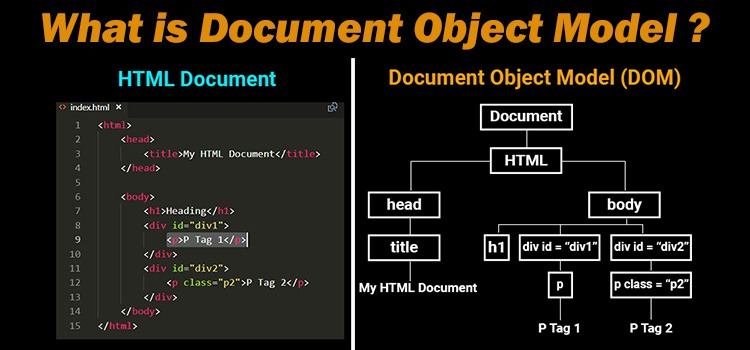

In [ ]:
!cat data/lec10_pic_ref.html

### HTML Tags

HTML tags define both:
* document structure elements and 
* document head/body elements.

<img src="imgs/webpage_anatomy.png" width="50%">

### Useful tags to know:

|Structure Elements|Description|Head/Body Elements|Description|
|---|---|---|---|
|`<html>`|the document|`<p>`|the paragraph|
|`<head>`|the header|`<h1>, <h2>, ...`|header(s)|
|`<body>`|the body|`<img>`|images|
|`<div>` |a logical division of the document|`<a>`| anchor (hyper-link)|
|`<span>`|an *in-line* logical division|[MANY MORE](https://en.wikipedia.org/wiki/HTML_element)||


### Example: Images and Hyperlinks and their attributes

* Tag for a picture (can use a link to the image):
```
<img src="HumDum.png" alt="Humbpty Dumpty">
```

* Tag for a hyperlink: 

```
<a href="https://ucsd.edu/">Visit our page!</a>
```


In [ ]:
!cat data/lec10_pic_ref.html

In [ ]:
HTML(open('data/lec10_pic_ref.html').read())

## div tag

```
<div style="background-color:lightblue">
  <h3>This is a heading</h3>
  <p>This is a paragraph.</p>
</div>
```

* The `<div>` tag defines a division or a section in an HTML document.

* The `<div>` element is often used as a container for other HTML elements to style them with CSS or to perform certain tasks with JavaScript.

* Often has attributes (important for scraping!)


# The HTML Document Tree

## The HTML Document Tree

* DOM represents a document as a logical tree.

<div class="image-txt-container">

<img src="imgs/webpage_anatomy.png" width="50%">

</div>    

Draw a DOM (tree) yourself!

## The HTML Document Tree

* DOM represents a document as a logical tree.

<div class="image-txt-container">

<img src="imgs/webpage_anatomy.png" width="50%">

<img src="imgs/dom_tree.png" width="50%">

</div> 

### Question: "quotes collection" website

* What do you think the DOM tree look like? (roughly)
* What would your table schema (i.e. rows/columns) look like?

<img src="imgs/quotes2scrape.png">

### Example (rough) document tree

* How you would you parse it, if you wanted to collect data:
    - Quote-by-quote (all attributes)?
    - Attribute-by-attribute?
    
<div class="image-txt-container">

<img src="imgs/quotes2scrape.png" width="50%">
    
<img src="imgs/quote_dom.png" width="50%">

</div> 

## BeautifulSoup: parsing the document tree

* [Beautiful Soup 4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) is a python HTML parser.
* **Warning:** BeautifulSoup has changed between versions, so make sure you are looking at documentation for the version you are using (4 here).

* Parse a small HTML "page", with corresponding tree below:

<img src="imgs/dom_tree_1.png" width="75%">

In [ ]:
s = '''
<body>

  <div id="content">
    <h1>Heading here</h1>
    <p>My First paragraph</p>
    <p>My <em>second</em> paragraph</p>
    <hr>
  </div>
  
  <div id="nav">
    <ul>
      <li>item 1</li>
      <li>item 2</li>
      <li>item 3</li>
    </ul>
  </div>

</body>
'''

In [ ]:
HTML(s)

### BeautifulSoup Parsing

* `bs4.BeautifulSoup` parses a string or file-like object representing HTML
* Returns a *parsed document*
* Use the `children` property to access child nodes.

In [ ]:
#help(bs4.BeautifulSoup)

In [ ]:
# usually s is a result of a GET request

soup = bs4.BeautifulSoup(s)
#soup
print(soup.prettify())

In [ ]:
type(soup)

In [ ]:
# print just the text
# What is a text on this document?

print(soup.text)

In [ ]:
soup.children
(soup.children)

In [ ]:
# what is the list iterator?
# Why are they useful?

list(soup.children)

In [ ]:
# what is the output?

#soup.children[0]

In [ ]:
root = list(soup.children)[0]



In [ ]:
# output?
root

In [ ]:
# it includes the text between the tags as leaf nodes in the tree

list(root.children)

### Discussion Question

What is the output of the following code:
```
list(list(list(soup.children)[0].children)[0].children)
```



<img src="imgs/dom_tree_1.png" width="75%">

In [ ]:
list(list(list(soup.children)[0].children)[0].children)

### Discussion Question

What is the output of the following code:
```
list(list(list(soup.children)[0].children)[0].children)[-2]
```
(*Note:* the output is a node element; if `-2` were `-1`, then the value would be `\n`)


<img src="imgs/dom_tree_1.png" width="75%">

In [ ]:
list(list(list(soup.children)[0].children)[0].children)[-2]

### Document tree traversal: depth-first

* Using `.children` attribute, traverse `soup` depth-first.
* Take care to only print node elements!

<img src="imgs/dom_tree_1.png" width="75%">

In [ ]:
soup

### Document tree traversal: depth-first

* Using `.children` attribute, traverse `soup` depth-first.
* Take care to only print node elements!

<img src="imgs/dom_tree_1.png" width="75%">

In [ ]:
# depth first search

def dfs(elt, visited):
    if elt not in visited:
        visited.append(elt)
        print(elt.name)
        for e in elt.children:
            if not isinstance(e, str):
                dfs(e, visited)
    return visited

In [ ]:
dfs(soup, [])

In [ ]:
# DFS using `descendants` property

children = []
for x in soup.descendants:
    print("HERE: " + str(x))
    children.append(x)

In [ ]:
children

## Selecting attributes of nodes
* The `.text` property of a tag element gets the text elements between the tags.
* The `.attrs` property lists all attributes of a tag.
* The `.get(key)` method, gets the value of a tag attribute.

In [ ]:
hdr = list(soup.descendants)[5]
hdr

In [ ]:
hdr.text

In [ ]:
div = list(soup.descendants)[20]
div

In [ ]:
div = list(soup.descendants)[20]
div

In [ ]:
div.attrs

In [ ]:
div.get('id')

## Selecting subtrees of the document tree

* Use the BeautifulSoup methods `find_**` to select subtrees
* `soup.find(name=None, attrs={}, recursive=True, text=None, **kwargs)`

## Selecting subtrees of the document tree

* Using `soup.find('div')`:


<div class="image-txt-container">
    
<img src="imgs/dom_tree_1.png" width="50%">
  
<img src="imgs/dom_subtree_1.png" width="40%">
    
</div>

In [ ]:
div = soup.find('div')
div

In [ ]:
type(div)

In [ ]:
soup.find('div', attrs={'id': 'nav'})

In [ ]:
soup.find_all('div')

In [ ]:
[x.text for x in soup.find_all('li')]

### Example: extracting data from HTML

* Let's parse the `dsc.ucsd.edu` schedule

In [ ]:
# url = "http://dsc.ucsd.edu/node/10"
# r = requests.get(url)   
# urlText = r.text


from bs4 import BeautifulSoup
soup = BeautifulSoup(urlText, 'html.parser')
soup

In [ ]:
# we can extract the title of the document

soup.find('title')
soup.title.text

In [ ]:
soup.find('title').contents

In [ ]:
# we can extract the first paragraph 

soup.find('p')

#open link in the browser, right click and "page source". Can you find <p> tags?
# and hyperlinks

In [ ]:
# Grab all the links

all_links  = soup.find_all('a')
all_links


In [ ]:
link = all_links[10]

In [ ]:
link.attrs

In [ ]:
link.get('href')

In [ ]:
# print all the links and their urls
for link in soup.find_all('a'):
    print('%s:%s(%s)' %(link.text, ' '*(50 - len(link.text)) , link.get('href', ' ')[:50]))


In [ ]:
# Show all the text as a string
print(soup.get_text())

### Example: scraping quotes
* Collect famous quotes and related data
* Requires scraping many pages to get data
* Parse the pages to extract information

<img src="imgs/quotes2scrape.png" width="50%">

### Scraping quotes: steps
1. What information to collect?
2. What pages are needed to visit? In what order?
3. What does our table schema look like?

<img src="imgs/quotes2scrape.png" width="50%">

In [ ]:
# scraping quotes:
# Columns: quote, author, author bio, binary column for each tag
# Create a dictionary (JSON) for each record
# Translate dictionary => dataframe
# make 1-2 observations about the data.

### Scraping quotes: proposed plan

1. Function `scrape_pages(urllist)` that scrapes a list of urls.
    - `requests` is only used here!    
2. Function `parse_quote_list(soup)` that selects the quotes information from a quote page.
3. Function `parse_author_info(author_soup)` that selects the author information from an author page.

**Tip:** Have functions that request and functions that parse, but not both! 
- Easier to debug and catch errors!
- Avoids unnecessary requests!

In [ ]:
# proposed plan:

def scrape_pages(urllist):
    
    out = []
    for url in urllist:
        
        # 1. request pages
        # 2. parse page w/bs4
        # 3. parse each quote on quote page
        #         4. extract info from each quote
        #         5. get author URL for each quote
        #         6. request auth page / parse / extract
        # 7. Add parsed info (DF) to out
        pass
        
    return pd.concat(out)

### Scraping quotes: `parse_quote_list(soup)`
* Develop function on a single page of quotes
* Wrap code in `parse_quote_list`

In [ ]:
resp = requests.get('http://quotes.toscrape.com/page/%d/' % 1)
soup = bs4.BeautifulSoup(resp.text)

In [ ]:
# Need: quote text, author name, author url, tags
print(soup)

In [ ]:
# grab each quote and parse!
# A quote is defined by a div with class "quote"!
quote = soup.find('div', attrs={'class': 'quote'})
quote

In [ ]:
# quote text
quote_text = quote.find('span', attrs='text').text
quote_text

In [ ]:
# author name
quote_auth = quote.find('small', attrs={'class': 'author'}).text
quote_auth

In [ ]:
# author url
auth_url = quote.find('a').get('href')
auth_url = 'http://quotes.toscrape.com' + auth_url
auth_url

In [ ]:
# tags
#quote.find('div', attrs={'class': 'tags'})

#quote.find('div', attrs={'class': 'tags'}).find_all('a')

quote_tags = [x.text for x in quote.find('div', attrs={'class': 'tags'}).find_all('a')]
quote_tags

In [ ]:
row = {}
row['quote_text'] = quote_text
row['quote_auth'] = quote_auth
row['auth_url'] = auth_url
for tag in quote_tags:
    row[tag] = 1

# Single row
pd.Series(row)

In [ ]:
def parse_quote_list(soup):
    
    out = []
    
    # Loop through all quotes
    quotes = soup.find_all('div', attrs={'class': 'quote'})
    for quote in quotes:
        
        # parse quote elements
        quote_text = quote.find('span', attrs='text').text
        quote_auth = quote.find('small', attrs={'class': 'author'}).text
        auth_url = quote.find('a').get('href')
        quote_tags = [x.text for x in quote.find('div', attrs={'class': 'tags'}).find_all('a')]
        
        # column - value mapping
        row = {}
        row['quote_text'] = quote_text
        row['quote_auth'] = quote_auth
        row['auth_url'] = 'http://quotes.toscrape.com' + auth_url
        for tag in quote_tags:
            row['tag_%s' % tag] = 1

        out.append(row)
        
    return pd.DataFrame(out)

In [ ]:
quotes_df = parse_quote_list(soup)
quotes_df

### Scraping quotes: `parse_author_info(author_soup)`
* Develop function on a single author page.
* Wrap code in `parse_author_info(author_soup)`

In [ ]:
url = quotes_df.auth_url.iloc[0]
author_resp = requests.get(url)
author_soup = bs4.BeautifulSoup(author_resp.text)

In [ ]:
# author bio, author bday, original url (to join)
author_soup

In [ ]:
dob = author_soup.find('span', attrs={'class': 'author-born-date'}).text
bio = author_soup.find('div', attrs={'class': 'author-description'}).text
author = author_soup.find('h3', attrs={'class': 'author-title'}).text

In [ ]:
auth_row = {'dob': dob, 'bio': bio, 'quote_auth': author}
auth_row # how to clean bio?

In [ ]:
def parse_author_info(author_soup):
    '''returns extracted author information from a parsed author page'''
    
    dob = author_soup.find('span', attrs={'class': 'author-born-date'}).text
    bio = author_soup.find('div', attrs={'class': 'author-description'}).text.strip()
    author = author_soup.find('h3', attrs={'class': 'author-title'}).text.strip()
    
    return {'dob': dob, 'bio': bio, 'quote_auth': author}

In [ ]:
parse_author_info(author_soup)

### Scraping quotes: Putting it together

* `scrape_pages` takes a list of urls and returns a dataframe of extracted info

In [ ]:
# proposed plan:

def scrape_pages(urllist):
    
    out = []
    for url in urllist:
        resp = requests.get(url)
        soup = bs4.BeautifulSoup(resp.text)
        if not resp.ok:
            return
        
        # parse quotes (dataframe):
        url_quotes = parse_quote_list(soup)
        out.append(url_quotes)
        
    quote_df = pd.concat(out, sort=False)
        
    # get author urls (fewest requests possible!)
    
    auth_out = []
    auth_urls = quote_df['auth_url'].unique()
    for auth_url in auth_urls:
        auth_resp = requests.get(auth_url)
        auth_soup = bs4.BeautifulSoup(auth_resp.text)
        auth = parse_author_info(auth_soup)
        auth_out.append(auth)
        
    auth_df = pd.DataFrame(auth_out)
    
    out_df = quote_df.merge(auth_df, on='quote_auth', how='left')
    
    return out_df

In [ ]:
urllist = ['http://quotes.toscrape.com/page/%d/' % x for x in range(1,3)]
urllist

In [ ]:
df = scrape_pages(urllist)

In [ ]:
df.head()

In [ ]:
df.quote_auth.value_counts()

In [ ]:
df.count()

### Scraping quotes: conclusion

* Make as few requests as possible
* Create a request/parsing plan *beforehand*
* Create your output schema *beforehand*
* Separate parsing and requests into different functions!

## Nested vs flat data structures

* Nested: HTML, JSON, XML
* Flat: CSV

Suppose we obtained the quotes data via an API and saved it to the file `quotes2scrape.json`
- `quotes2scrape.json` is a 'json records file'; each line is a valid json object

In [ ]:
import json
json.loads(open('data/quotes2scrape.json').readline())

In [ ]:
# read in all the lines: each element is a dictionary
L = [json.loads(x) for x in open('data/quotes2scrape.json')]

In [ ]:
# What happended to the tags column?
df = pd.DataFrame(L)
df.head()

In [ ]:
distinct_tags = np.unique(df.tags.sum())

In [ ]:
def list2series(taglist):
    return pd.Series({k:1 for k in taglist})

tags = df.tags.apply(list2series)
tags.head()

In [ ]:
# combine them
pd.concat([df, tags], axis=1)

### Converting JSON to CSV

* Flattening the nested list requires a lot of space. Why?
* We can't always read in *all* the JSON; might need to extract just what we need line-by-line.
* A JSON records file is **not** valid JSON. Why? Why can't we just use JSON?